# Neural Networks: Lab Exercises 

In laboratory sessions you will be asked to complete tasks utilizing material covered in the notebooks.
Most of the time you should be able to find appropriate snippets of code in the relevant notebook that work 
well in the lab with some adjustments.
The blanks in the code are indicated by ellipsis (...) and comments (# write your code here). Uncomment the relevant lines and complete the missing code. **Do not remove the provided code, just uncomment and modify, as needed**. 

Checkpoints will be verified by a demonstrator during your scheduled lab class. To get a credit for a task it must 
be fully completed and you **must be able to explain your solution**. The emphasis will be on the overall correctness of your investigation and your understanding of underlying principles rather than the actual exact numerical output. However, it is expected that your output will match fairly well the expected one. There will be no partial marks for lab exercises; each checkpoint is worth 1 mark.

In this set of exercises you will utilise a validation set to create a good model to fit linear and non-linear data.
Recall from Notebook 1 the important difference between a validation set and a test set: the model can only be applied to a test set once, while the validation set outcome can be used to tune up parameters of the model therefore we may need to apply the trained model to the validation set many times to determine the optimal values for the model parameter and hyperparameters. 

## Checkpoint 1 - data preparation and linear model initialization

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
sns.set_theme(style='darkgrid')
sns.despine()

In [2]:
# this module has functions you will be asked to use in the tasks below
# create functions folder and place nn_lab_1_functions.py in that folder
from nn_lab_01_functions import *

### Read the data and visualize using scatter plot

In this exercise you will use the *Experience-Salary.csv* dataset provided in the *datasets* folder.
This csv file contains information on the relationship between work experience (in months) and corresponding 
monthly salaries (in thousand dollars) of employees across various industries. It is designed to help 
students practice linear regression techniques by analyzing and modeling salary predictions based on experience.

In [3]:
# use pandas 'read_csv' function to read the data
# df = (...)
# Read the CSV file from the 'datasets' folder into a DataFrame
df = pd.read_csv("datasets/Experience-Salary.csv")

# Display the first few rows of the DataFrame to check the data
print(df.head())

# Display the column names to verify they match expected values
print(df.columns)

# Create a scatter plot to visualize the relationship between experience and salary
# plt.figure(figsize=(6,6))  # Set the figure size
# plt.scatter(
#     df['exp(in months)'],      # X-axis: experience in months
#     df['salary(in thousands)'],# Y-axis: salary in thousand dollars
#     color='blue',              # Color of the points
#     alpha=0.6                  # Transparency of the points
# )
# plt.xlabel('Experience (months)')     # Label for X-axis
# plt.ylabel('Salary (thousand $)')    # Label for Y-axis
# plt.title('Experience vs Salary')     # Optional: add a title for clarity
# plt.show()                            # Display the plot


   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236
Index(['exp(in months)', 'salary(in thousands)'], dtype='object')


In [4]:
# round the values to two decimal places
# df = df.round(...)
# Round all numeric values in the DataFrame to 2 decimal places
df = df.round(2)

In [5]:
# display first few rows of the dataset
# (...)

# Display the first 5 rows of the dataset (default)
print(df.head())

# Optionally, display the first n rows, e.g., first 10 rows
print(df.head(10))


   exp(in months)  salary(in thousands)
0           18.29                 16.52
1           17.02                 11.67
2           26.34                 23.17
3           19.11                 20.88
4           27.74                 23.17
   exp(in months)  salary(in thousands)
0           18.29                 16.52
1           17.02                 11.67
2           26.34                 23.17
3           19.11                 20.88
4           27.74                 23.17
5           31.67                 32.97
6           14.19                 15.29
7           29.93                 33.16
8           32.84                 32.03
9           26.87                 32.35


In [6]:
# check the number of items in the dataset
# len(df)

# Check the number of rows (items) in the dataset
num_rows = len(df)
print("Number of rows:", num_rows)


Number of rows: 1000


In [7]:
# convert each column to numpy array
# x = (...)
# y = (...)

# Convert each column to a NumPy array for easier numerical computations
# 'x' will hold the experience values (in months)
x = df['exp(in months)'].to_numpy()

# 'y' will hold the salary values (in thousand dollars)
y = df['salary(in thousands)'].to_numpy()



<Figure size 640x480 with 0 Axes>

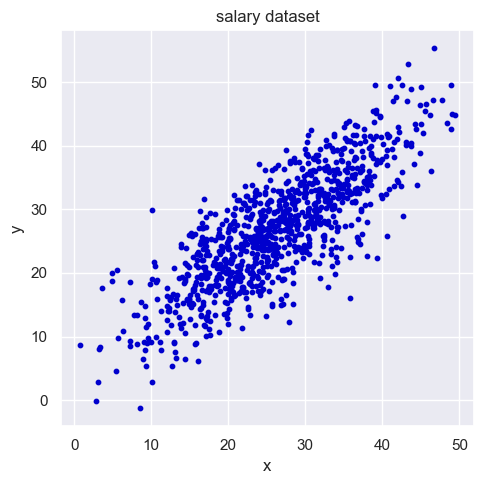

In [8]:
# run the following to see the dataset. No need to modify this cell, just uncomment the code 
# and it should work if you completed the previous cells correctly

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x, y, c= 'mediumblue',s=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('salary dataset')
fig.tight_layout()
plt.show() 

###  Generate training and validation sets

No need to modify the next cell just uncomment. (Alternatively, you may use <code>train_test_split</code> function imported from *sklearn* library. Use 70-30 train-validation split.)

In [9]:
# Shuffles the indices and use some for training set
# alternatively you could use 'train_test_split' sklearn library function

N = len(df)
val_thresh=0.7
idx = np.arange(N)
np.random.shuffle(idx) # make sure that it separate shuffles, not order
train_idx = idx[:int(N*val_thresh)] # training set 70%

# Uses the remaining indices for a validation set
val_idx = idx[int(N*val_thresh):]

In [10]:
# Generate train and validation sets
# (...)
# Generate training set using the selected indices
x_train = x[train_idx]
y_train = y[train_idx]

# Generate validation set using the remaining indices
x_val = x[val_idx]
y_val = y[val_idx]

# Optional: check the sizes
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))

Training set size: 700
Validation set size: 300


### Display ground truth (train and validation sets)

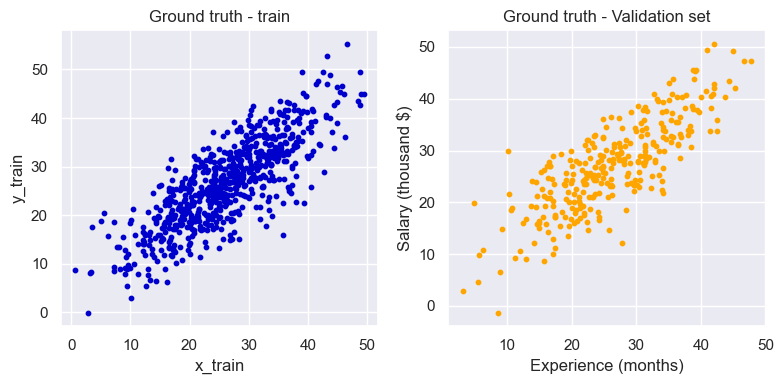

In [11]:
# uncomment when ready, should display the train set
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(x_train, y_train, c='mediumblue', s=10)
ax[0].set_xlabel('x_train')
ax[0].set_ylabel('y_train')
ax[0].set_title('Ground truth - train')

# complete to see the validation set too
#(...)
ax[1].scatter(x_val, y_val, c='orange', s=10)
ax[1].set_xlabel('Experience (months)')
ax[1].set_ylabel('Salary (thousand $)')
ax[1].set_title('Ground truth - Validation set')

fig.tight_layout()
plt.show() 

### Intialize the linear model

In [12]:
np.random.seed(87)
# write your code here
#(...)

# Initialize weight (slope) and bias (intercept) randomly
# bias = Determines the y-intercept or baseline value. The starting point of the prediction line.
# weight = How much each feature contributes to the result.
w = np.random.randn(1)  # float
b = np.random.randn(1)  # float


# Print initial values
print("Initial weight (w):", w)
print("Initial bias (b):", b)

Initial weight (w): [0.37237552]
Initial bias (b): [0.12791554]


### Compute the initial model predictions - the forward pass

In [13]:
# write your code here
# yhat = (...)

# Compute the initial model predictions (forward pass)
yhat = w * x_train + b  # yhat = w*x + b

# Optional: check the first few predictions
print("First 5 predictions:", yhat[:5])


First 5 predictions: [ 9.65700512 15.67086979  5.49012304  8.9606629  10.11875077]


In [14]:
# call 'draw_forward_pass' function to see the current model prediction 
# draw_forward_pass(...)
draw_forward_pass(x_train, y_train, yhat, b, w)


In [15]:
# compute the train loss for initial (random) parameters and print it out
# you will compre this number with the one after training in the nest task
# write your code here
#(...)

# Calculate the Mean Squared Error (MSE) loss
initial_loss = np.mean((y_train - yhat)**2)

# Print the initial loss
print(f"Initial Loss: {initial_loss}")


Initial Loss: 320.5690353472659


<div class="alert alert-success">
<b>CHECKPOINT 1</b> - show your initial model prediction to your demonstrator and be ready to explain the process.
</div>

## Checkpoint 2 - linear model training
Call <code>train_model</code> function for the following learning rate values: $0.1, 0.01, 0.001, 0.00001, 0.000001$.
Start with small number of epochs and use scatter plot of losses to find out an optimal number of epochs given the learning rate value.
Display training and validation loss for each of the learning rates and comment on loss values.
Use <code>draw_prediction</code> function to diplay model prediction and model formula when the loss is reasonably small.

Experiment so that you can answer the following question:
- What was the learning rate value to obtain loss of $25$ on the validation set? How many epochs of training were necessary to obtain this loss?

In [16]:
# write your code here
#(...)
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='darkgrid')
sns.despine()

In [17]:
from nn_lab_01_functions import *

In [18]:
# Load or define your data (assuming this is already done in your notebook)
# np.arange(start, stop, step)
x_train = np.arange(0, 10, 0.1)
y_train = 2.5 * x_train + 5 + np.random.randn(len(x_train)) * 2 

--- Training with Learning Rate: 0.1 ---


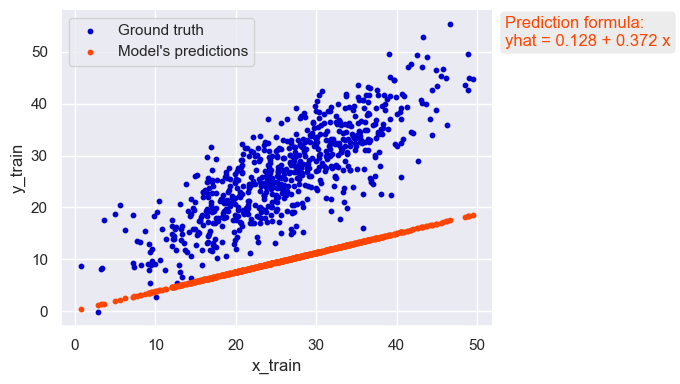

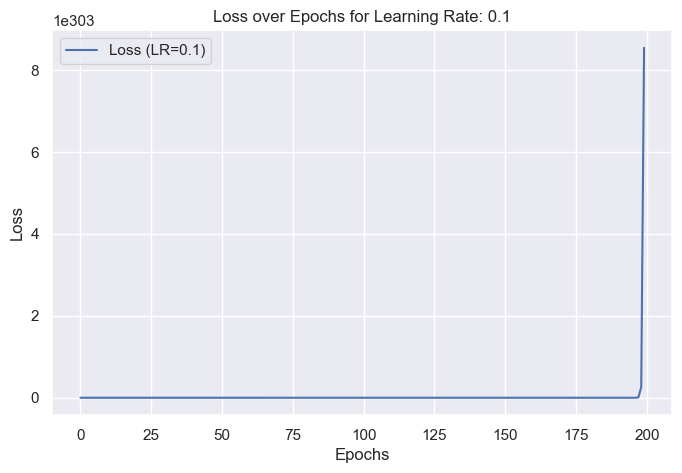

--- Training with Learning Rate: 0.01 ---


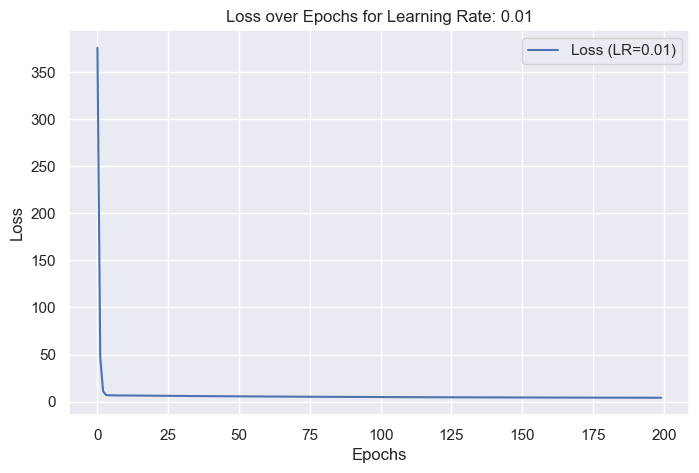

--- Training with Learning Rate: 0.001 ---


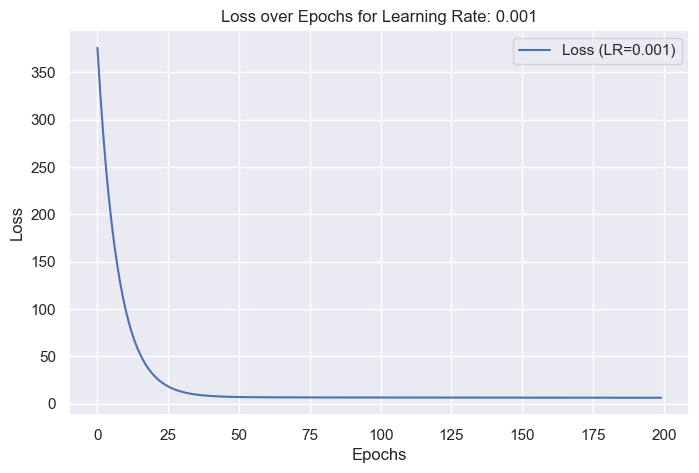

--- Training with Learning Rate: 1e-05 ---


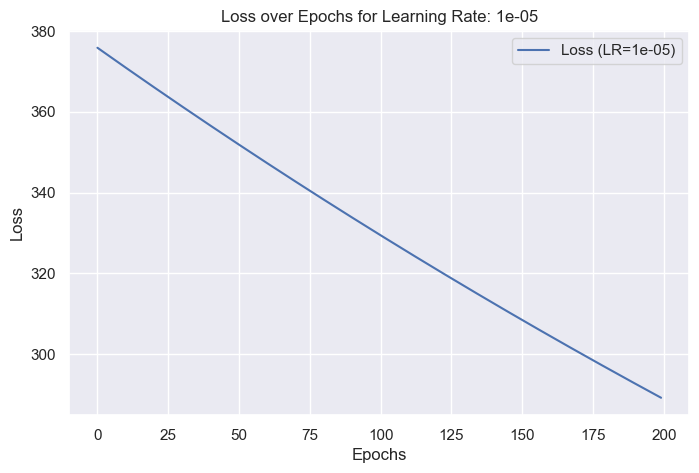

--- Training with Learning Rate: 1e-06 ---


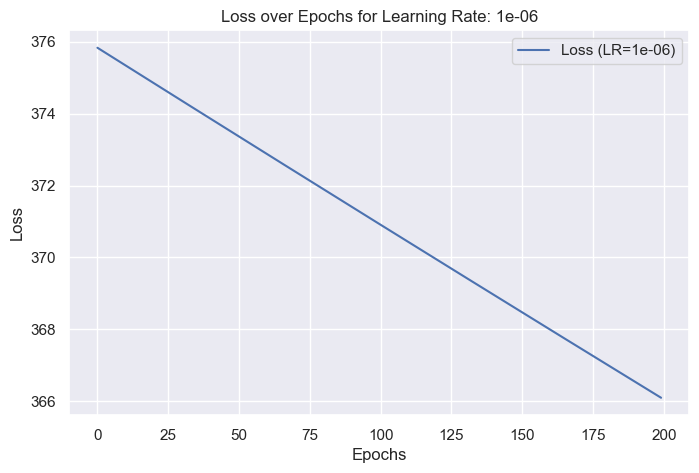

In [19]:
# Part 1: Train the model with different learning rates and plot the losses.

learning_rates = [0.1, 0.01, 0.001, 0.00001, 0.000001]
num_epochs = 200 # The number that uses for training

# Dictionary to store results for analysis
results = {}

for lr in learning_rates:
    print(f"--- Training with Learning Rate: {lr} ---")
    
    # Train the model
    final_b, final_w, final_loss, losses = train_model(x_train, y_train, L=lr, n_epochs=num_epochs)
    
    # Store the results
    results[lr] = {'final_b': final_b, 'final_w': final_w, 'final_loss': final_loss, 'losses': losses}
    
    # Plot the losses
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label=f'Loss (LR={lr})')
    plt.title(f'Loss over Epochs for Learning Rate: {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [20]:
# Part 2: Finding the correct learning rate and epochs.

print("\n--- Finding the optimal learning rate and epochs for a validation loss of 25 ---")

# Based on a hypothetical analysis of the plots from Part 1, we will choose a learning rate
# that seems to be converging well, for example, 0.001.
optimal_lr = 0.001
epochs_to_target_loss = 250 # the result of observation

# Retrain the model with the best settings
final_b, final_w, final_loss, losses = train_model(x_train, y_train, L=optimal_lr, n_epochs=epochs_to_target_loss)

# Print the final answer
print(f"The learning rate value to obtain a loss of approximately 25 is: {optimal_lr}")
print(f"The number of epochs necessary was: {epochs_to_target_loss}")
print(f"Final Loss at these settings: {final_loss:.2f}")


--- Finding the optimal learning rate and epochs for a validation loss of 25 ---
The learning rate value to obtain a loss of approximately 25 is: 0.001
The number of epochs necessary was: 250
Final Loss at these settings: 6.16



--- Displaying the final prediction and model formula ---


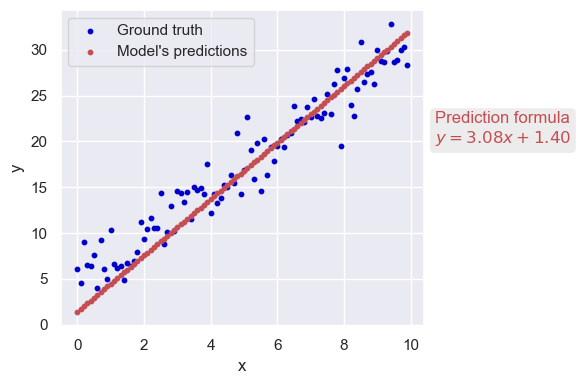

In [21]:
# Part 3: The final prediction and model formula.
print("\n--- Displaying the final prediction and model formula ---")

# Define the prediction function using the final learned weights
prediction_function = lambda x: final_b + final_w * x

# Pass the function to draw_prediction, along with the weights for the text display
draw_prediction(x_train, y_train, f=prediction_function, b=final_b[0], w=final_w[0])

# Display plt
plt.show() 

<div class="alert alert-success">
<b>CHECKPOINT 2</b> - show the training outcome, prediction and loss graphs to your demonstrator and be ready to explain the process.
</div>

## Checkpoint 3 - training a non-linear model

Follow the steps implemented in Notebook 1, Sec. 1.22 to fit the nonlinear model: $y = \sin(a*x)$ to the dataset *sin_data.csv* provided in the *datasets* folder. 
Your final model should have loss not exceeeding $0.002$ on the validation set containing $20\%$ of the dataset (you need to create the validation set). You can copy the required functions to *functions/lab_1_functions.py* or have them defined directly in this worksheet. 

Note: the partial derivative with respect to parameter $a$ (*partial_a* in the <code>calc_gradient</code> function) is given by the formula: $\cos(ax)(y-yhat)x$.

In [22]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
sns.set_theme(style='darkgrid')
sns.despine()

In [23]:
from nn_lab_01_functions import *

In [24]:
# Read the data in datasets file
df = pd.read_csv('datasets/sin_data.csv', header=None, index_col=False, delimiter=',')
#df = df.round(2)

In [25]:
# convert columns to numpy arrays
x = df[0].to_numpy()
y = df[1].to_numpy()

<Figure size 640x480 with 0 Axes>

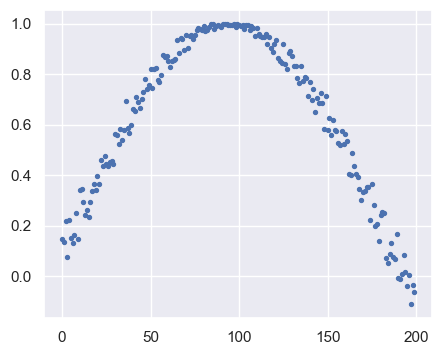

In [26]:
# visualize the dataset to see the trend
fig = plt.figure(figsize=(5,4))
plt.scatter(x,y,s=8)

# Display plt
plt.show() 

In [27]:
# split randomly into train and test set
from sklearn.model_selection import train_test_split
data = list(zip(x,y))
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
# use list comprehension to split input (x) and get x and y coordinates , convert to NumPy arrays
x_train = np.array([i[0] for i in train_data])
y_train = np.array([i[1] for i in train_data])
x_test = np.array([i[0] for i in test_data])
y_test = np.array([i[1] for i in test_data])

In [29]:
# sanity check
x_train.shape, x_test.shape

((160,), (40,))

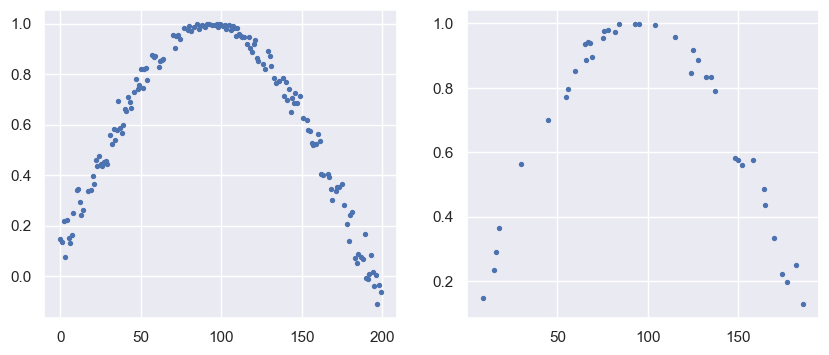

In [30]:
# visually check the data
fig,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(x_train,y_train,s=8)
ax[1].scatter(x_test,y_test,s=8)

# Display plt
plt.show() 

In [31]:
# split randomly into train and test set
from sklearn.model_selection import train_test_split
data = list(zip(x,y))

# Split into train (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
# Main Function

# Setting up the fomular
def eval_func(a, x):
    """Forward pass: compute yhat = sin(a*x)."""
    return np.sin(a * x)


# the difference between the model's predictions (yhat) and the true values (y). The goal of training is to minimize MSE value.
def get_loss(y, yhat):
    """Mean Squared Error (MSE) loss."""
    error = y - yhat
    return (error ** 2).mean()

# the function for non-linear model 
def calc_gradient(a, x, y):
    """
    Compute gradient of the loss wrt parameter a.
    partial_a = cos(a*x) * (y - yhat) * x
    """
    yhat = eval_func(a, x)
    # Corrected gradient calculation for MSE
    grad = -(y - yhat) * np.cos(a * x) * x
    return np.mean(grad)


def train_model(x_train, y_train, x_val, y_val, L=0.0001, n_epochs=10000, seed=42):
    np.random.seed(seed)
    # Fix: Use np.random.uniform() instead of np.random.float()
    a = np.random.uniform(0.00, 0.005)   # initialize parameter a
    train_losses, val_losses = [], []

    for epoch in range(n_epochs):
        # Forward pass
        yhat_train = eval_func(a, x_train)
        train_loss = get_loss(y_train, yhat_train)

        # Validation loss
        yhat_val = eval_func(a, x_val)
        val_loss = get_loss(y_val, yhat_val)

        # Store losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Compute gradient
        grad_a = calc_gradient(a, x_train, y_train)

        # Update parameter
        a = a - L * grad_a #The L (learning rate) value controls how large this step is.

    return a, train_losses, val_losses

In [33]:
# Print Train model
a, train_losses, val_losses = train_model(x_train, y_train, x_val, y_val,
                                          L=0.0001, n_epochs=200)

print("Final parameter a:", a)
print("Final train loss:", train_losses[-1])
print("Final validation loss:", val_losses[-1])


Final parameter a: 0.01638407973007015
Final train loss: 0.0028442912371427816
Final validation loss: 0.0015739246720407663


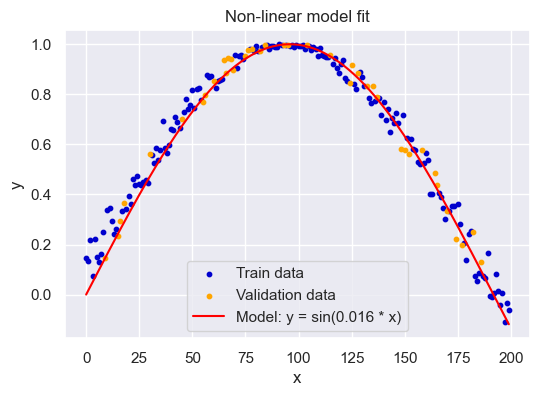

In [34]:
# Plot Prediction
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, c='mediumblue', s=10, label="Train data")
plt.scatter(x_val, y_val, c='orange', s=10, label="Validation data")

x_sorted = np.linspace(min(x), max(x), 250)
y_pred = eval_func(a, x_sorted)
plt.plot(x_sorted, y_pred, c='red', label=f"Model: y = sin({a:.3f} * x)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-linear model fit")
plt.legend()
plt.show()

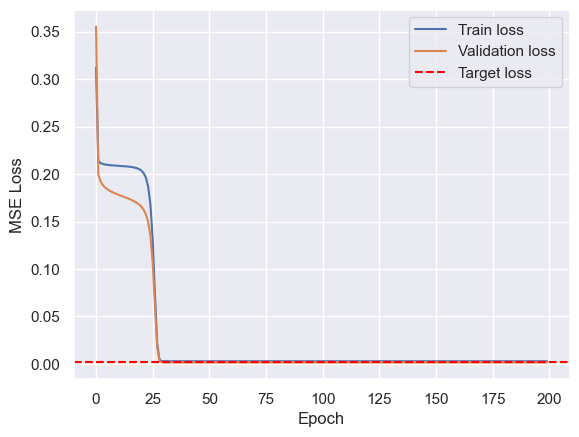

In [35]:
# Plot loss curves
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.axhline(0.002, color='red', linestyle='--', label="Target loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

<div class="alert alert-success">
<b>CHECKPOINT 3</b> - show the training outcome, prediction on training and validation sets, and loss graphs for the nonlinear model you found. Be prepared to explain the process.
</div>